In [15]:
# Dethär är bara lite test


import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from IPython.display import clear_output, display


all_years = []
all_mil = []
all_price = []
percent = display(str(round(100*0/115)) + "%",display_id=True)
for i in range(1,115):
    percent.update(str(round(100*i/115)) + "%")
    my_url = f'https://www.blocket.se/annonser/hela_sverige/fordon/bilar?cb=40&cbl1=6&cg=1020&mys=2010&page={i}&ps=2'
    uClient = uReq(my_url)
    page_html = uClient.read()
    uClient.close()

    page_soup = soup(page_html, "html.parser")
    containers = page_soup.findAll("div", {"class":"styled__Wrapper-sc-1kpvi4z-0 itHtzm"})

    for cont in containers:
        try:
            attributes = cont.findAll("li", {"class":"ParametersList__ListItem-sc-18ndpo4-2 bQxiZq"})
            year = int(''.join(c for c in attributes[0].text if c.isdigit()))
            mil = int(''.join(c for c in attributes[2].text.split("-")[1] if c.isdigit()))
            price_str = cont.find("div", {"TextSubHeading__TextSubHeadingWrapper-sc-1ilszdp-0 bcaUdR Price__Wrapper-sc-1v2maoc-0 bNwNaE"})
            price = int(''.join(c for c in price_str.text.split("(")[0] if c.isdigit()))
            
            all_years.append(year)
            all_mil.append(mil)
            all_price.append(price)
        except IndexError:
            print(attributes[2].text)


'99%'

Manuell
Manuell
Manuell
Automat
Manuell
Mer än 50 000 mil
Automat
Manuell
Automat


In [1]:
import datetime

class Car:
    def __init__(self, url):
        self.url = url
        uClient = uReq(self.url)
        page_html = uClient.read()
        uClient.close()
        page_soup = soup(page_html, "html.parser")
        
        price_str = page_soup.find("div", {"class":"TextHeadline1__TextHeadline1Wrapper-sc-18mtyla-0 jwGyyY Price__StyledPrice-crp2x0-0 EkzGO"}).text
        self.price = int(''.join(c for c in price_str.split("(")[0] if c.isdigit()))
        
        date_str = page_soup.find("span", {"class":"TextCallout2__TextCallout2Wrapper-sc-19qvftl-0 gxfHlJ PublishedTime__StyledTime-pjprkp-1 ZAknf"}).text
        self.date = self.get_date(date_str)
        
        self.basic_info = {}
        info_cont = page_soup.find("div", {"class":"AdParams__ParamsWrapper-sc-1vxw014-2 gWITvi"})
        key_div = info_cont.findAll('div', {'class':'TextCallout2__TextCallout2Wrapper-sc-19qvftl-0 gxfHlJ ParamsWithIcons__StyledLabel-hanfos-2 fSgrOG'})
        info_div = info_cont.findAll('div', {'class':'TextCallout1__TextCallout1Wrapper-qzrnab-0 lkIkoj ParamsWithIcons__StyledParamValue-hanfos-3 eZCCwh'})
        
        for key, info in zip(key_div, info_div):
            self.basic_info.update( {key.text : info.text} )
            
        car_features = page_soup.findAll("li", {"class":"CarFeaturesList__ListItem-sc-1sasr52-3 joupKr"})
        self.equipment = [e.text for e in car_features]
        self.description = page_soup.find("div", {"class":"TextBody__TextBodyWrapper-sc-17pzx5f-0 lbkVoL BodyCard__DescriptionPart-sc-15r463q-2 bYSeDO"}).text
        self.sensor = self.has_sensor(self.equipment, self.description)
        self.prev_price = [self.price]
        self.sold = False
        self.milage = int(self.basic_info["Miltal"].split('-')[-1].replace(' ',''))
        try:
            self.hp = int(''.join(c for c in self.basic_info["Hästkrafter"] if c.isdigit()))
        except KeyError:
            self.hp = None
            print(self.url)
        self.year = int(self.basic_info["Modellår"].replace(' ',''))
        print('New:', self.price, self.url)
            

    def has_sensor(self, equipment, description):
        keywords = ['parkeringssensor', 
                    'backkamera',
                    'psensor',
                    'p-sensor',
                    'kamera',
                    'back-kamera']
        for k in keywords:
            if k in description.casefold():
                return True
        for k in keywords:
            for e in equipment:
                if k in e.casefold():
                    return True
        return False
        
    def get_date(self, string):
        year = '2020'
        if "idag" in string:
            return datetime.datetime.today().date()
        if "igår" in string:
            return datetime.datetime.today().date() - datetime.timedelta(days = 1)
        if 'måndags' in string:
            offset = (datetime.datetime.today().weekday() - 0)%7
            return datetime.datetime.today().date() - datetime.timedelta(days = offset)
        if 'tisdags' in string:
            offset = (datetime.datetime.today().weekday() - 1)%7
            return datetime.datetime.today().date() - datetime.timedelta(days = offset)
        if 'onsdags' in string:
            offset = (datetime.datetime.today().weekday() - 2)%7
            return datetime.datetime.today().date() - datetime.timedelta(days = offset)
        if 'torsdags' in string:
            offset = (datetime.datetime.today().weekday() - 3)%7
            return datetime.datetime.today().date() - datetime.timedelta(days = offset)
        if 'fredags' in string:
            offset = (datetime.datetime.today().weekday() - 4)%7
            return datetime.datetime.today().date() - datetime.timedelta(days = offset)
        if 'lördags' in string:
            offset = (datetime.datetime.today().weekday() - 5)%7
            return datetime.datetime.today().date() - datetime.timedelta(days = offset)
        if 'söndags' in string:
            offset = (datetime.datetime.today().weekday() - 6)%7
            return datetime.datetime.today().date() - datetime.timedelta(days = offset)
            
        
        mounth_dict = {
            'jan.' : '01',
            'feb.' : '02',
            'mars' : '03',
            'apr.' : '04',
            'maj' : '05',
            'juni' : '06',
            'juli' : '07',
            'aug.' : '08',
            'sep.' : '09',
            'okt.' : '10',
            'nov.' : '11',
            'dec.' : '12'
        }
        string = string.replace("Inlagd: ",'')[0:-6].split(' ')
        d = string[0]
        m = mounth_dict[string[1]]
        date_str = year + '-' + m + '-' + d
        date = datetime.datetime.strptime(date_str, '%Y-%m-%d').date()
        if date > datetime.datetime.today().date():
            date = date - datetime.timedelta(days = 365)
        return date
    
    def update_price(self, new_price):
        if not new_price == self.price:
            self.price = new_price
            self.prev_price.append(self.price)
            print("Updated price:", self.prev_price, car.url)
            
        
        

In [15]:
#FILL INITIAL SET OF CARS
'''
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from IPython.display import clear_output, display
print('started')

import math 
import pickle
import time

my_url = f'https://www.blocket.se/annonser/hela_sverige/fordon/bilar?cb=40&cbl1=6&cchb=1&ccsc=1&cg=1020&f=c&mye=2017&mys=2013&page=1&sort=date'
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html, "html.parser")
pages_str = page_soup.find("div", {'data-cy':"search-result-count"}).text
print(pages_str)
pages = math.ceil(int(''.join(c for c in pages_str if c.isdigit()))/40)
print(pages)

car_array = []
cars_len = display(str(len(car_array)),display_id=True)
i = 1
for i in range(1, pages+1):
    my_url = f'https://www.blocket.se/annonser/hela_sverige/fordon/bilar?cb=40&cbl1=6&cchb=1&ccsc=1&cg=1020&f=c&mye=2017&mys=2013&page={i}&sort=date'
    uClient = uReq(my_url)
    page_html = uClient.read()
    uClient.close()

    page_soup = soup(page_html, "html.parser")
    containers = page_soup.findAll("div", {"class":"styled__Wrapper-sc-1kpvi4z-0 itHtzm"})
    url_array = ['https://www.blocket.se'+c['to'] for c in containers]

    for url in url_array:
        car_array.append(Car(url))
        cars_len.update(str(len(car_array)))
            
c_time = int(time.time())
filename = f"cars_at_{c_time}.pickle"
pickle_out = open(filename, "wb")
pickle.dump(car_array, pickle_out)
pickle_out.close()
print(filename)
'''
    

started
877 annonser
22


'877'

https://www.blocket.se/annons/skane/volkswagen_golf_gtd_dsg_pano_dynaudio_lagmil/89415300
https://www.blocket.se/annons/stockholm/volkswagen_golf_1_4_5_dorrar_tgi_cng_auto_eur/89278557
https://www.blocket.se/annons/stockholm/volkswagen_golf_r_facelift_4_m_panorama_svens/88440412
https://www.blocket.se/annons/stockholm/volkswagen_golf_2_0tdi_gtd_dsg_184hk_6200mil/89072004
https://www.blocket.se/annons/jonkoping/volkswagen_golf_1_4_tsi_140_bluemotion_highl/89027764
https://www.blocket.se/annons/stockholm/volkswagen_golf_1_2tsi_master_110hk_6400mil/89024544
https://www.blocket.se/annons/stockholm/volkswagen_golf_gte_1_4_tsi_plug_in_4700mil/88773357
https://www.blocket.se/annons/stockholm/volkswagen_golf_1_2_tsi_bluemotion__105hk_/88977891
https://www.blocket.se/annons/stockholm/volkswagen_golf_gti_performance_1_90__ranta/88691853
https://www.blocket.se/annons/halland/volkswagen_golf_1_4_tgi_cng_0kr_kontant/88964113
https://www.blocket.se/annons/stockholm/volkswagen_golf_1_6_tdi_style_105h

In [12]:
## Add new cars
import bs4
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
from IPython.display import clear_output, display
print('started')

import math 
import pickle
import time

file_name = "cars_at_1601013947.pickle"
pickle_in = open(file_name, 'rb')
car_array = pickle.load(pickle_in)
pickle_in.close()

my_url = f'https://www.blocket.se/annonser/hela_sverige/fordon/bilar?cb=40&cbl1=6&cchb=1&ccsc=1&cg=1020&f=c&mye=2017&mys=2013&page=1&sort=date'
uClient = uReq(my_url)
page_html = uClient.read()
uClient.close()
page_soup = soup(page_html, "html.parser")
pages_str = page_soup.find("div", {'data-cy':"search-result-count"}).text
pages = math.ceil(int(''.join(c for c in pages_str if c.isdigit()))/40)

all_car_url = [car.url for car in car_array]

cars_len = display(str(len(car_array)),display_id=True)
i = 1
new_cars = True
found_url = []
print(pages)
for i in range(1, pages+1):
    my_url = f'https://www.blocket.se/annonser/hela_sverige/fordon/bilar?cb=40&cbl1=6&cchb=1&ccsc=1&cg=1020&f=c&mye=2017&mys=2013&page={i}&sort=date'
    uClient = uReq(my_url)
    page_html = uClient.read()
    uClient.close()

    page_soup = soup(page_html, "html.parser")
    containers = page_soup.findAll("div", {"class":"styled__Wrapper-sc-1kpvi4z-0 itHtzm"})

    for cont in containers:
        url = 'https://www.blocket.se'+cont['to']
        found_url.append(url)
        if not url in all_car_url:
            print("Added new car", url)
            car_array.append(Car(url))
            cars_len.update(str(len(car_array)))
        else:
            print("Already existing car", url)
            price_str = cont.find("div", {"TextSubHeading__TextSubHeadingWrapper-sc-1ilszdp-0 bcaUdR Price__Wrapper-sc-1v2maoc-0 bNwNaE"})
            price = int(''.join(c for c in price_str.text.split("(")[0] if c.isdigit()))
            for car in car_array:
                if car.url == url:
                    car.update_price(price)

for car in car_array:
    if not car.url in found_url and not car.sold:
        print("Sold car", car.price, car.url)
        car.sold = True
            
c_time = int(time.time())
filename = f"cars_at_{c_time}.pickle"
pickle_out = open(filename, "wb")
pickle.dump(car_array, pickle_out)
pickle_out.close()
print(filename)

started


'1831'

14
Sold car 244900 https://www.blocket.se/annons/orebro/volkswagen_golf_gte_plug_in_hybrid_aut_204hk/87211045
Sold car 159000 https://www.blocket.se/annons/skane/volkswagen_golf_1_2_tsi_110hk_dsg_comfort_5dr/86182066
Sold car 110000 https://www.blocket.se/annons/skane/volkswagen_golf_5_dorrar_1_6_tdi_dsg_bluemoti/89416971
Sold car 149900 https://www.blocket.se/annons/ostergotland/volkswagen_golf_1_4_tsi_dsg_premium_140hk/87189748
Sold car 199000 https://www.blocket.se/annons/sodermanland/volkswagen_golf_5_door_gtd_2_0_dsg_euro_6_184/89382158
Sold car 259900 https://www.blocket.se/annons/uppsala/volkswagen_e_golf_24_2_kwh_single_speed_comfo/88870066
Sold car 129000 https://www.blocket.se/annons/skane/volkswagen_golf_5_dorrar_1_2_tsi_style_euro_6/86926579
Sold car 134900 https://www.blocket.se/annons/stockholm/volkswagen_golf_1_4_tgi_cng_style_110hk/89255144
Sold car 219000 https://www.blocket.se/annons/stockholm/volkswagen_e_golf_vii_5dr_24_2_kwh_utr/85299135
Sold car 122900 https://www

cars_at_1608500079.pickle


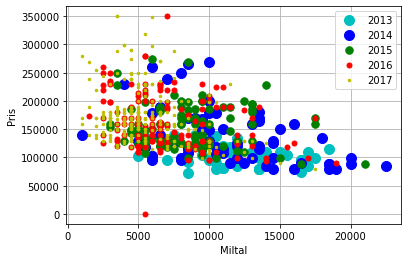

2013 https://www.blocket.se/annons/jonkoping/vw_golf_plus_1_6_tdi_bmt_drag_vhjul_105hk/89183519 Diesel 
1331
621


In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
import pickle

file_name = "cars_at_1589229389.pickle"
pickle_in = open(file_name, 'rb')
cars = pickle.load(pickle_in)
pickle_in.close()

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))

milage = [car.milage for car in cars if car.year == 2013 and car.sensor] 
price = [car.price for car in cars if car.year == 2013 and car.sensor]
plt.plot(milage,price,'.c', markersize = 20, label = '2013')

milage = [car.milage for car in cars if car.year == 2014 and car.sensor] 
price = [car.price for car in cars if car.year == 2014 and car.sensor]
plt.plot(milage,price,'.b', markersize = 20, label = '2014')

milage = [car.milage for car in cars if car.year == 2015 and car.sensor]
price = [car.price for car in cars if car.year == 2015 and car.sensor]
plt.plot(milage,price,'.g', markersize = 15, label = '2015')

milage = [car.milage for car in cars if car.year == 2016 and car.sensor]
price = [car.price for car in cars if car.year == 2016 and car.sensor]
plt.plot(milage,price,'.r', markersize = 10, label = '2016')

milage = [car.milage for car in cars if car.year == 2017 and car.sensor]
price = [car.price for car in cars if car.year == 2017 and car.sensor]
plt.plot(milage,price,'.y', markersize = 5, label = '2017')

plt.legend()
plt.grid()
#plt.axis([0, 18000, 60000, 180000])
#plt.gcf().autofmt_xdate()
#plt.ylim([60000, 150000])
plt.xlabel('Miltal')
plt.ylabel('Pris')
#plt.savefig('2013.png')
plt.show()

req = [car for car in cars if car.milage < 10000 and car.price < 100000 and car.year == 2014 and not car.sold]
for car in [car for car in cars if car.year == 2013 and car.sensor and car.price < 80000 and car.milage < 9000] :
    print(car.year, car.url, car.basic_info['Bränsle'])
print(len(cars))
print(len([car for car in cars if car.sensor]))


1331
True


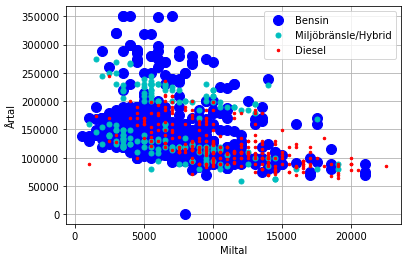

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

file_name = "cars_at_1589229389.pickle"
pickle_in = open(file_name, 'rb')
cars = pickle.load(pickle_in)
pickle_in.close()

#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))
print(len(cars))
cars = [car for car in cars if "Bränsle" in car.basic_info]
print('Bensin' in cars[4].basic_info['Bränsle'])



milage = [car.milage for car in cars if car.basic_info['Bränsle'] == 'Bensin '] 
price = [car.price for car in cars if car.basic_info['Bränsle'] == 'Bensin ']
plt.plot(milage,price,'.b', markersize = 20, label = 'Bensin')

milage = [car.milage for car in cars if car.basic_info['Bränsle'] == 'Miljöbränsle/Hybrid '] 
price = [car.price for car in cars if car.basic_info['Bränsle'] == 'Miljöbränsle/Hybrid ']
plt.plot(milage,price,'.c', markersize = 10, label = 'Miljöbränsle/Hybrid')

milage = [car.milage for car in cars if car.basic_info['Bränsle'] == 'Diesel '] 
price = [car.price for car in cars if car.basic_info['Bränsle'] == 'Diesel ']
plt.plot(milage,price,'.r', markersize = 5, label = 'Diesel')


plt.legend()
plt.grid()
#plt.axis([4000, 20000, 60000, 120000])
#plt.gcf().autofmt_xdate()
#plt.ylim([60000, 150000])
plt.xlabel('Miltal')
plt.ylabel('Årtal')
plt.savefig('2013.png')
plt.show()


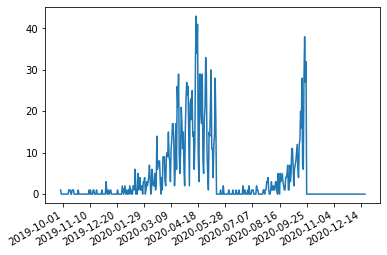

2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-17
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-16
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15
2020-04-15

2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-16
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-15
2020-09-14
2020-09-14
2020-09-14
2020-09-14
2020-09-14
2020-09-14
2020-09-14
2020-09-14
2020-09-14
2020-09-14
2020-09-14
2020-09-14
2020-09-13
2020-09-13
2020-09-13
2020-09-13
2020-09-12
2020-09-12
2020-09-12
2020-09-12
2020-09-12
2020-09-12
2020-09-11
2020-09-11
2020-09-11
2020-09-11
2020-09-11
2020-09-11
2020-09-11
2020-09-11
2020-09-11
2020-09-11
2020-09-11
2020-09-11
2020-09-10
2020-09-10
2020-09-10
2020-09-10
2020-09-10
2020-09-10
2020-09-10
2020-09-10
2020-09-10
2020-09-10
2020-09-09
2020-09-09
2020-09-09
2020-09-09
2020-09-09
2020-09-09
2020-09-09
2020-09-09
2020-09-08
2020-09-08
2020-09-08
2020-09-08
2020-09-08
2020-09-08
2020-09-08
2020-09-07
2020-09-07

In [15]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

file_name = "cars_at_1608500079.pickle"
#file_name = "cars_at_1589229389.pickle"
pickle_in = open(file_name, 'rb')
cars = pickle.load(pickle_in)
pickle_in.close()

dates = [car.date for car in cars]
c_date = min(dates)
occurances = []
plot_dates = []
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
while not c_date == tomorrow:
    #print(dates.count(c_date))
    occurances.append(dates.count(c_date))
    plot_dates.append(c_date)
    c_date += datetime.timedelta(days=1)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=40))
    
plt.plot(plot_dates,occurances)
        
plt.gcf().autofmt_xdate()
plt.show()

today = datetime.date.today()
yesterday = datetime.date.today() + datetime.timedelta(days=-1)
day_before = datetime.date.today() + datetime.timedelta(days=-2)
todays_cars = [car for car in cars if car.date==today]
yesterday_cars = [car for car in cars if car.date==yesterday]
day_before_cars = [car for car in cars if car.date==day_before]


for car in cars:
    print(car.date)

Text(0, 0.5, 'Årtal')

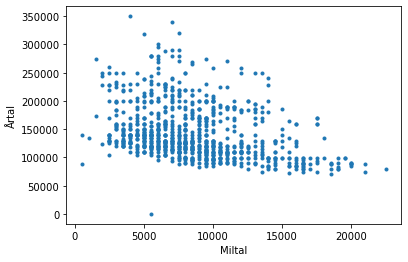

In [22]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt

file_name = "cars_at_1601013947.pickle"
pickle_in = open(file_name, 'rb')
cars = pickle.load(pickle_in)
pickle_in.close()

price = [car.price for car in cars if car.year in [2014, 2015, 2016]]
milage = [car.milage for car in cars if car.year in [2014, 2015, 2016]]
plt.plot(milage,price,'.')
plt.xlabel('Miltal')
plt.ylabel('Årtal')